<a href="https://colab.research.google.com/github/binhduc0402/BT_AI/blob/main/Rain_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c4cf19396f2c3a5ea99345aa73461d2230ae24a1c8293fd39420f68590a28367
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


0.9102564102564102


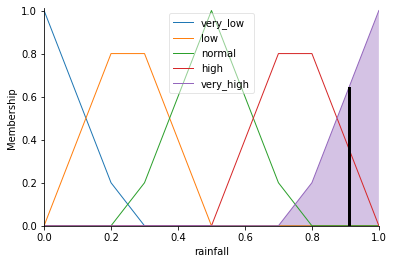

In [ ]:
import skfuzzy as fuzzy
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

names = ['wind_speed', 'temperature']
universes = [np.arange(0, 1.05, 0.05)] * len(names)
antecedents = dict(zip(names, [ctrl.Antecedent(u, n) for u, n in zip(universes, names)]))
rainfall = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'rainfall')

# Define membership functions for antecedents
mf_params = {
    'very_low': [0, 0, 0.25],
    'low': [0, 0.25, 0.5],
    'normal': [0.25, 0.5, 0.75],
    'high': [0.5, 0.75, 1],
    'very_high': [0.75, 1, 1]
}

for antecedent in antecedents.values():
    for mf_name, mf_param in mf_params.items():
        antecedent[mf_name] = fuzzy.trimf(antecedent.universe, mf_param)

rainfall['very_low'] = fuzzy.trimf(rainfall.universe, [0, 0, 0.25])
rainfall['low'] = fuzzy.trimf(rainfall.universe, [0, 0.25, 0.5])
rainfall['normal'] = fuzzy.trimf(rainfall.universe, [0.25, 0.5, 0.75])
rainfall['high'] = fuzzy.trimf(rainfall.universe, [0.5, 0.75, 1])
rainfall['very_high'] = fuzzy.trimf(rainfall.universe, [0.75, 1, 1])

rules = [   ctrl.Rule(antecedents['wind_speed']['very_low']&antecedents['temperature']['very_low'],rainfall['very_low']),
            ctrl.Rule(antecedents['wind_speed']['very_low'] & antecedents['temperature']['low'], rainfall['very_low']),
            ctrl.Rule(antecedents['wind_speed']['very_low'] & antecedents['temperature']['normal'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['very_low'] & antecedents['temperature']['high'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['very_low'] & antecedents['temperature']['very_high'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['low'] & antecedents['temperature']['very_low'], rainfall['very_low']),
            ctrl.Rule(antecedents['wind_speed']['low'] & antecedents['temperature']['low'], rainfall['very_low']),
            ctrl.Rule(antecedents['wind_speed']['low'] & antecedents['temperature']['normal'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['low'] & antecedents['temperature']['high'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['low'] & antecedents['temperature']['very_high'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['normal'] & antecedents['temperature']['very_low'], rainfall['very_low']),
            ctrl.Rule(antecedents['wind_speed']['normal'] & antecedents['temperature']['low'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['normal'] & antecedents['temperature']['normal'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['normal'] & antecedents['temperature']['high'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['normal'] & antecedents['temperature']['very_high'], rainfall['high']),
            ctrl.Rule(antecedents['wind_speed']['high'] & antecedents['temperature']['very_low'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['high'] & antecedents['temperature']['low'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['high'] & antecedents['temperature']['normal'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['high'] & antecedents['temperature']['high'], rainfall['high']),
            ctrl.Rule(antecedents['wind_speed']['high'] & antecedents['temperature']['very_high'], rainfall['very_high']),
            ctrl.Rule(antecedents['wind_speed']['very_high'] & antecedents['temperature']['very_low'], rainfall['low']),
            ctrl.Rule(antecedents['wind_speed']['very_high'] & antecedents['temperature']['low'], rainfall['normal']),
            ctrl.Rule(antecedents['wind_speed']['very_high'] & antecedents['temperature']['normal'], rainfall['high']),
            ctrl.Rule(antecedents['wind_speed']['very_high'] & antecedents['temperature']['high'], rainfall['high']),
            ctrl.Rule(antecedents['wind_speed']['very_high'] & antecedents['temperature']['very_high'], rainfall['very_high'])
        ]
rainfall_ctrl=ctrl.ControlSystem(rules)
rainfalls=ctrl.ControlSystemSimulation(rainfall_ctrl)
rainfalls.input['wind_speed']=1
rainfalls.input['temperature']=1
rainfalls.compute()
print(rainfalls.output['rainfall'])
rainfall.view(sim=rainfalls)
         